Benchmarking standard matrix multiplication...
Benchmarking NumPy matrix multiplication...


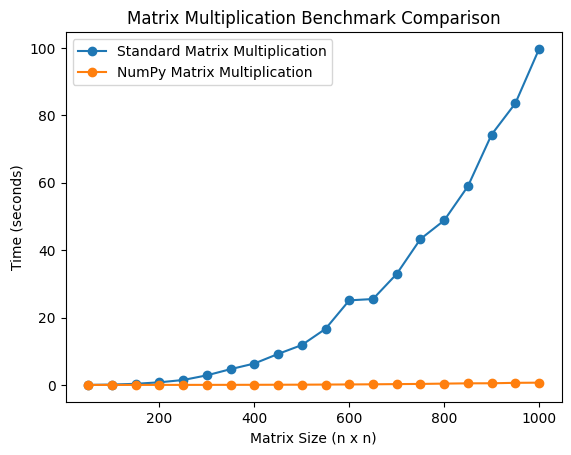

In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

#Task a)
def generate_matrix(n):
    #Generates a random n x n matrix with integer elements between 1 and 10
    return [[random.randint(1, 10) for _ in range(n)] for _ in range(n)]

def standard_matrix_multiplication(A, B):
    #Performs standard matrix multiplication
    n = len(A)
    C = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

#Task b)
def benchmark_standard_multiplication(sizes):
    #Benchmarks the standard matrix multiplication over a range of sizes
    standard_times = []
    for n in sizes:
        A = generate_matrix(n)
        B = generate_matrix(n)
        start_time = time.time()
        standard_matrix_multiplication(A, B)
        elapsed_time = time.time() - start_time
        standard_times.append(elapsed_time)
    return standard_times

#Task c)
def benchmark_numpy_multiplication(sizes):
    #Benchmarks NumPy's matrix multiplication over a range of sizes
    numpy_times = []
    for n in sizes:
        #Generates A and B, two nxn matrices filled with random integers between 1 and 10
        A = np.random.randint(1, 10, (n, n))
        B = np.random.randint(1, 10, (n, n))
        start_time = time.time()
        #Perform numpy matrix multiplication
        np.dot(A, B)
        elapsed_time = time.time() - start_time
        numpy_times.append(elapsed_time)
    return numpy_times

#Task d)
#The standard matrix multiplication algorithm has a time complexity of O(n^3). This is due to the three nested loops (each looping over n elements) -> n*n*n
#NumPy’s matrix multiplication is optimized with highly efficient linear algebra libraries that are designed to take advantage of modern CPU architecture.
#This results in a lower effective time complexity.

def main():
    # Define matrix sizes to test ( 50, 100, 150, ..., up to 1000)
    matrix_sizes = range(50, 1001, 50)
    
    # Benchmark the standard matrix multiplication
    print("Benchmarking standard matrix multiplication...")
    standard_times = benchmark_standard_multiplication(matrix_sizes)
    
    # Benchmark NumPy's matrix multiplication
    print("Benchmarking NumPy matrix multiplication...")
    numpy_times = benchmark_numpy_multiplication(matrix_sizes)
    
    # Plotting the results
    plt.plot(matrix_sizes, standard_times, label="Standard Matrix Multiplication", marker='o')
    plt.plot(matrix_sizes, numpy_times, label="NumPy Matrix Multiplication", marker='o')
    plt.xlabel("Matrix Size (n x n)")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.title("Matrix Multiplication Benchmark Comparison")
    plt.show()


if __name__ == "__main__":
    main()